# view_kmodes_clusters

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Choose cluster number to visualize
# For N=5: 0,1,2,3,4,5
N = 4
# Set font size
mpl.rcParams['font.size'] = 10

In [3]:
# Load data
excel = 'clusters.xlsx'
df = pd.read_excel(excel, sheet_name=f'cluster_{N}', index_col=0).astype(str)
df.head()

,Cluster,Phylogroup,CH Type,blaCTX-M genes,Virulence pattern
45H16,4,D,ST38,CTXM-15/27,3.4
50H16,4,D,ST38,CTXM-27,2.2
61H17,4,D,ST38,CTXM-27,2.2
71H17,4,D,ST38,CTXM-27,2.2
84H18,4,D,ST38,CTXM-27,2.2


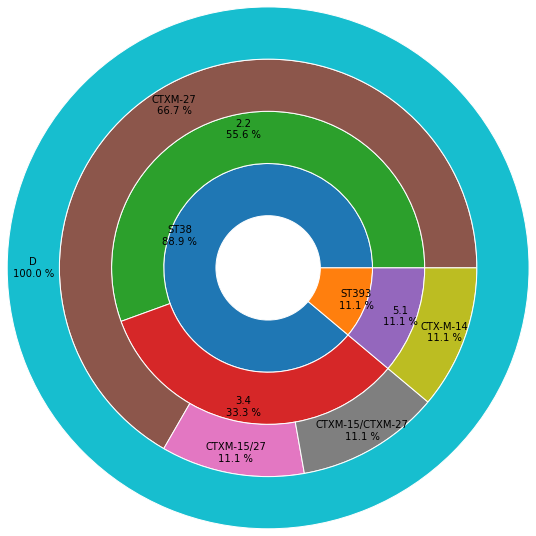

In [4]:
# Nested donut plot

# Global variable class affects labels
#https://stackoverflow.com/questions/59885597/create-donut-using-pie-chart-with-custom-labels
class MyClass:
    i = -1

# Function to make custom labels
def func(pct, labels, vals):
    MyClass.i +=1
    # Returns absolute value against the default percentage
    # absolute = int(pct/100.*np.sum(vals))
    # Combine labels and values
    return "{:s}\n{:.1f} %".format(labels[MyClass.i], pct)

# Actual plot
fig, ax = plt.subplots()

outer_radius = 1.8
size = 0.6
mydistance = 0.9

# Draw every donut individually
ax.pie(df['CH Type'].value_counts(), radius=outer_radius-size,
       autopct=lambda pct: func(pct,df['CH Type'].value_counts().index, df['CH Type'].value_counts()), pctdistance=0.9 ,
       wedgeprops=dict(width=size, edgecolor='w'))
class MyClass:
    i = -1
    
ax.pie(df['Virulence pattern'].value_counts(), radius=outer_radius,
       autopct=lambda pct: func(pct, df['Virulence pattern'].value_counts().index, df['Virulence pattern'].value_counts()), pctdistance=0.9,
       wedgeprops=dict(width=size, edgecolor='w'))
class MyClass:
    i = -1

ax.pie(df['blaCTX-M genes'].value_counts(), radius=outer_radius+size,
       autopct=lambda pct: func(pct, df['blaCTX-M genes'].value_counts().index ,df['blaCTX-M genes'].value_counts()), pctdistance=0.9,
       wedgeprops=dict(width=size, edgecolor='w'))
class MyClass:
    i = -1

    
ax.pie(df['Phylogroup'].value_counts(), radius=outer_radius+2*size,
       autopct=lambda pct: func(pct, df['Phylogroup'].value_counts().index, df['Phylogroup'].value_counts()), pctdistance=0.9,
       wedgeprops=dict(width=size, edgecolor='w'))
class MyClass:
    i = -1

ax.set(aspect="equal")
plt.show()
fig.savefig(f'cluster_{N}.png',dpi=300,bbox_inches='tight')
plt.show()